In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2024-07-25 07:13:13--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.05s   

2024-07-25 07:13:13 (7.85 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [2]:
!mkdir ./pretrained

In [3]:
!wget -O /content/pretrained/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O /content/pretrained/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true

--2024-07-25 07:13:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/pretrained/yolov3.weights’

/content/pretrained 100%[===================>] 236.52M  16.5MB/s    in 28s     

2024-07-25 07:14:24 (8.50 MB/s) - ‘/content/pretrained/yolov3.weights’ saved [248007048/248007048]

--2024-07-25 07:14:24--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2024-07-25 07:14:24--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to g

In [4]:
weight_path = '/content/pretrained/yolov3.weights'
cfg_path = '/content/pretrained/yolov3.cfg'

In [5]:
import os
import cv2

In [7]:
#욜로 네트워크 접속
yolo_net = cv2.dnn.readNetFromDarknet(cfg_path, weight_path)

In [9]:
#각 라벨에 이름 설정
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [10]:
#욜로 네트워크 레이블 확인
layer_names = yolo_net.getLayerNames()
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [11]:
#출력 레이어 번호 확인
yolo_net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [13]:
#출력 레이어 이름 확인 & 변수 저장
outlayer_names = [layer_names[i - 1] for i in yolo_net.getUnconnectedOutLayers()]
outlayer_names

['yolo_82', 'yolo_94', 'yolo_106']

array([[[ 19,  16,  18],
        [ 19,  16,  18],
        [ 20,  18,  18],
        ...,
        [ 47,  71,  47],
        [ 39,  63,  39],
        [ 64,  88,  64]],

       [[ 20,  17,  19],
        [ 20,  17,  19],
        [ 20,  18,  18],
        ...,
        [ 71,  94,  72],
        [ 40,  63,  41],
        [ 36,  59,  37]],

       [[ 20,  18,  18],
        [ 20,  18,  18],
        [ 20,  18,  18],
        ...,
        [ 82, 101,  84],
        [ 54,  73,  56],
        [ 40,  60,  41]],

       ...,

       [[198, 217, 225],
        [199, 218, 226],
        [201, 220, 228],
        ...,
        [190, 217, 231],
        [189, 216, 230],
        [188, 215, 229]],

       [[198, 217, 225],
        [198, 217, 225],
        [199, 218, 226],
        ...,
        [188, 215, 229],
        [188, 215, 229],
        [186, 213, 227]],

       [[199, 216, 225],
        [199, 216, 225],
        [198, 215, 224],
        ...,
        [186, 213, 227],
        [186, 213, 227],
        [186, 213, 227]]], dtype=uint8)
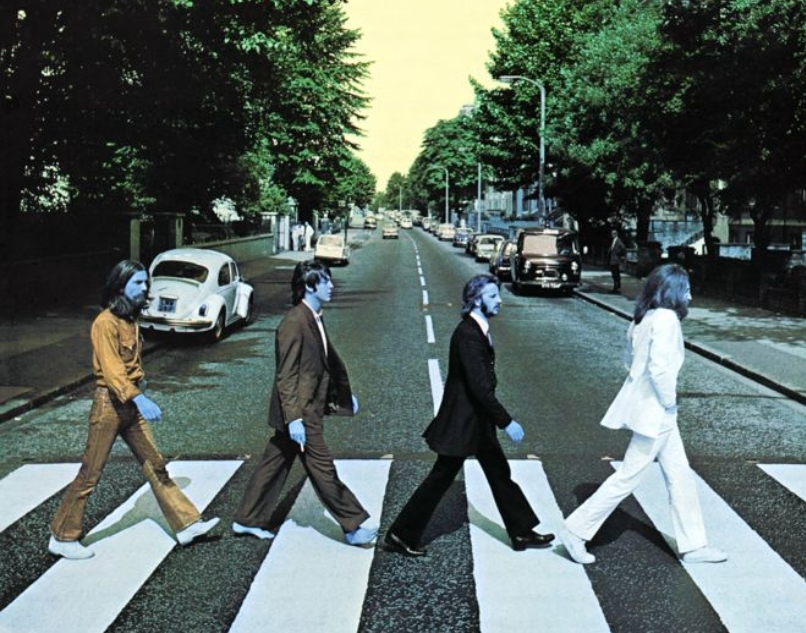

In [14]:
img = cv2.imread('./data/beatles01.jpg')
img

array([[[ 18,  16,  19],
        [ 18,  16,  19],
        [ 18,  18,  20],
        ...,
        [ 47,  71,  47],
        [ 39,  63,  39],
        [ 64,  88,  64]],

       [[ 19,  17,  20],
        [ 19,  17,  20],
        [ 18,  18,  20],
        ...,
        [ 72,  94,  71],
        [ 41,  63,  40],
        [ 37,  59,  36]],

       [[ 18,  18,  20],
        [ 18,  18,  20],
        [ 18,  18,  20],
        ...,
        [ 84, 101,  82],
        [ 56,  73,  54],
        [ 41,  60,  40]],

       ...,

       [[225, 217, 198],
        [226, 218, 199],
        [228, 220, 201],
        ...,
        [231, 217, 190],
        [230, 216, 189],
        [229, 215, 188]],

       [[225, 217, 198],
        [225, 217, 198],
        [226, 218, 199],
        ...,
        [229, 215, 188],
        [229, 215, 188],
        [227, 213, 186]],

       [[225, 216, 199],
        [225, 216, 199],
        [224, 215, 198],
        ...,
        [227, 213, 186],
        [227, 213, 186],
        [227, 213, 186]]], dtype=uint8)
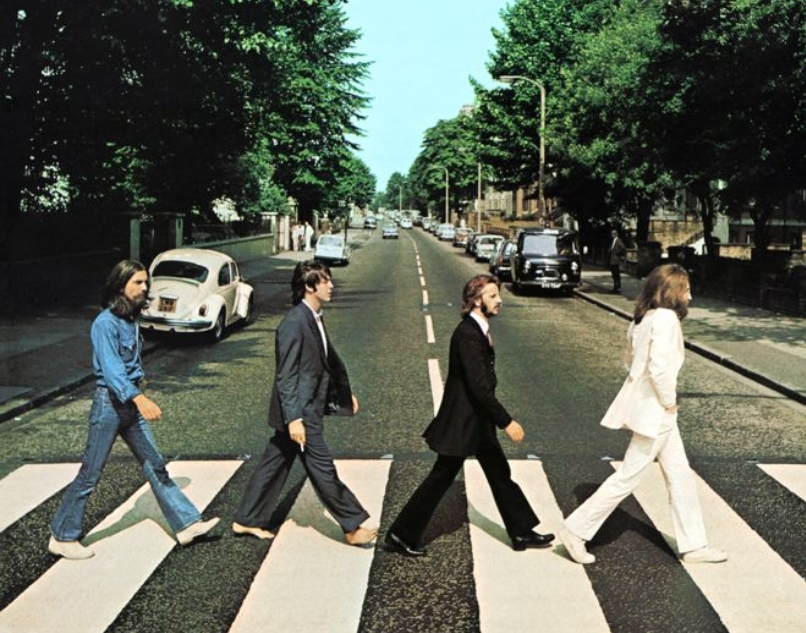

In [15]:
#이미지 형식 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb

In [16]:
#이미지 전처리후 욜로 네트워크 입력
yolo_net.setInput(cv2.dnn.blobFromImage(img_rgb, 1/255.0, (416, 416), swapRB=True, crop=False))

In [17]:
#순뱡향으로 전달
cv_outs = yolo_net.forward(outlayer_names)

In [18]:
len(cv_outs)

3

In [27]:
print(13*13*3, 26*26*3, 52*52*3)

507 2028 8112


In [25]:
cv_outs[0].shape  # bounding box : 507, box가 85차원

(507, 85)

In [28]:
cv_outs[1].shape  # bounding box : 2028, box가 85차원

(2028, 85)

In [29]:
cv_outs[2].shape  # bounding box : 8112, box가 85차원

(8112, 85)

In [19]:
import numpy as np

In [21]:
# 원본이미지 size

rows = img.shape[0]
cols = img.shape[1]
conf_threshold=0.5
nms_threshold=0.4
green_color = (0,255,0)
red_color = (0,0,255)
class_ids = []
confidences = []
boxes = []

In [31]:
for ix, output in enumerate(cv_outs):
  for jx, detection in enumerate(output): # output layer 하나씩 나옴...
    scores = detection[5:]  # x, y, w, h, conf
    class_id = np.argmax(scores)  # 80 class확률값 => class 번호
    confidence = scores[class_id]

    if confidence > conf_threshold: # confidence score > 0.5
      center_x = int(detection[0] * cols)  # bounding box 중심좌표 정규화값
      center_y = int(detection[1] * rows) # bounding box 중심좌표 정규화값
      w = int(detection[2] * cols)  # bounding box width 정규화값
      h = int(detection[3] * rows)  # bounding box height 정규화값
      x = int(center_x - w / 2)  # bounding box 좌상단 x좌표
      y = int(center_y - h / 2)  # bounding box 좌상단 y좌표

      print('layer num :', ix, 'bb num :', jx, 'obj class :', class_id, 'conf :', confidence, 'bb_loc:', [w, h, x, y])

      class_ids.append(class_id)
      confidences.append(float(confidence))
      boxes.append([x, y, w, h])



layer num : 0 bb num : 316 obj class : 0 conf : 0.77102214 bb_loc: [173, 312, 25, 255]
layer num : 0 bb num : 319 obj class : 0 conf : 0.8539558 bb_loc: [172, 311, 47, 254]
layer num : 0 bb num : 328 obj class : 0 conf : 0.7115168 bb_loc: [161, 317, 246, 238]
layer num : 0 bb num : 334 obj class : 0 conf : 0.99606514 bb_loc: [186, 292, 386, 271]
layer num : 0 bb num : 337 obj class : 0 conf : 0.8705503 bb_loc: [211, 291, 396, 272]
layer num : 0 bb num : 343 obj class : 0 conf : 0.99568856 bb_loc: [173, 307, 569, 258]
layer num : 1 bb num : 831 obj class : 2 conf : 0.77389765 bb_loc: [71, 68, 502, 226]
layer num : 1 bb num : 832 obj class : 2 conf : 0.61488414 bb_loc: [78, 68, 499, 226]
layer num : 1 bb num : 877 obj class : 2 conf : 0.77301663 bb_loc: [117, 101, 139, 239]
layer num : 1 bb num : 955 obj class : 2 conf : 0.86677265 bb_loc: [118, 96, 137, 246]
layer num : 1 bb num : 1202 obj class : 0 conf : 0.91595364 bb_loc: [105, 265, 264, 252]
layer num : 1 bb num : 1259 obj class : 0

In [ ]:
# 동일 object에 하나의 bounding box만 존재.. => NMS

In [32]:
idx = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)  # 중복  bounding box제거
idx


array([ 3,  5, 14, 12, 27, 22,  9, 29,  6, 25, 30, 26], dtype=int32)

In [33]:
import matplotlib.pyplot as plt

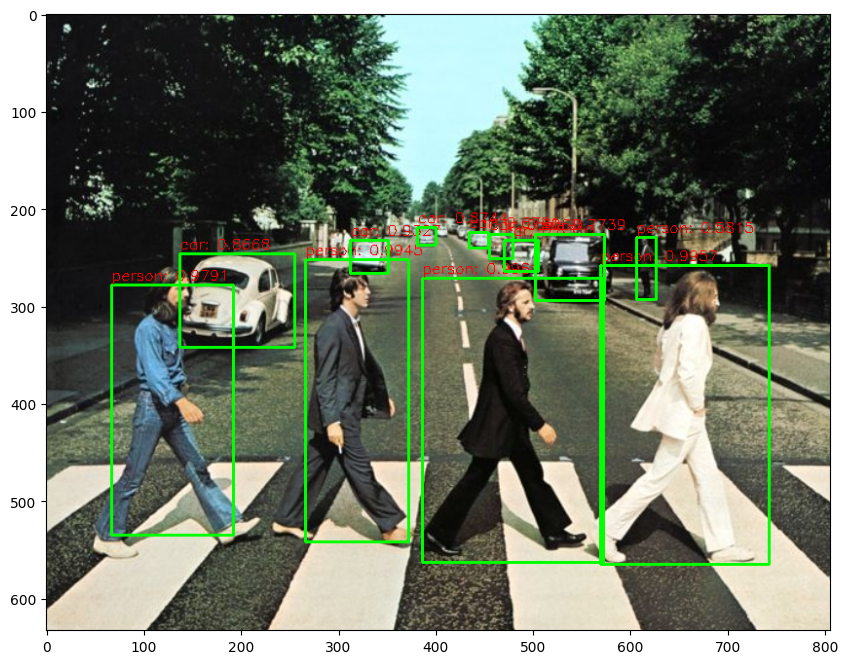

In [36]:
if len(idx) > 0:

  draw_img = img.copy()

  for i in idx.flatten():
    box = boxes[i]
    left = box[0]  # x
    top = box[1]   # y
    width = box[2] # width
    height = box[3]  # height

    caption= "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])

    cv2.rectangle(draw_img, (left, top), (left + width, top + height), green_color, 2)
    cv2.putText(draw_img, caption, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)